# Project 1: Monetary Policy Surprises and Financial Market Reactions
## step 1 - Load and inspect raw data

In [1]:
import pandas as pd

In [2]:
dgs2 = pd.read_csv(
    "../data/raw/DGS2.csv",
    parse_dates= ["date"]
)

dgs2.head()

,date,DGS2
0,1994-01-03,4.30
1,1994-01-04,4.29
2,1994-01-05,4.31
3,1994-01-06,4.24
4,1994-01-07,4.09


In [3]:
import os
os.getcwd()

'C:\\Users\\dm46143p\\fomc_market_reaction\\notebooks'

In [4]:
dgs10 = pd.read_csv(
    "../data/raw/DGS10.csv",
    parse_dates= ["date"]
)

dgs10.head()

,date,DGS10
0,1994-01-03,5.92
1,1994-01-04,5.88
2,1994-01-05,5.90
3,1994-01-06,5.84
4,1994-01-07,5.70


In [5]:
dgs10.columns

Index(['date', 'DGS10'], dtype='object')

In [6]:
vix = pd.read_csv(
    "../data/raw/VIXCLS.csv",
    parse_dates= ["date"]
)

vix.head()

,date,VIXCLS
0,1994-01-03,12.57
1,1994-01-04,11.91
2,1994-01-05,10.94
3,1994-01-06,11.27
4,1994-01-07,10.96


In [7]:
vix.columns

Index(['date', 'VIXCLS'], dtype='object')

In [8]:
sp500 = pd.read_csv(
    "../data/raw/SP500_STOOQ.csv",
    parse_dates= ["date"]
)

sp500.head()

,date,Open,High,Low,Close,Volume
0,1994-01-03,466.51,466.94,464.36,465.44,150077778
1,1994-01-04,465.44,466.89,464.44,466.89,181444444
2,1994-01-05,466.89,467.82,465.92,467.55,222238889
3,1994-01-06,467.55,469.00,467.02,467.12,203311111
4,1994-01-07,467.09,470.26,467.03,469.90,180511111


In [9]:
sp500.columns

Index(['date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [10]:
sp500 = sp500[["date" , "Close"]]
sp500.head()

,date,Close
0,1994-01-03,465.44
1,1994-01-04,466.89
2,1994-01-05,467.55
3,1994-01-06,467.12
4,1994-01-07,469.90


In [11]:
df = dgs2.merge(dgs10, on="date" , how="inner")
df.head()

,date,DGS2,DGS10
0,1994-01-03,4.30,5.92
1,1994-01-04,4.29,5.88
2,1994-01-05,4.31,5.90
3,1994-01-06,4.24,5.84
4,1994-01-07,4.09,5.70


In [12]:
df = df.merge(vix, on="date" , how="inner")
df.head()

,date,DGS2,DGS10,VIXCLS
0,1994-01-03,4.30,5.92,12.57
1,1994-01-04,4.29,5.88,11.91
2,1994-01-05,4.31,5.90,10.94
3,1994-01-06,4.24,5.84,11.27
4,1994-01-07,4.09,5.70,10.96


In [13]:
df = df.merge(sp500, on="date" , how="inner")
df.head()

,date,DGS2,DGS10,VIXCLS,Close
0,1994-01-03,4.30,5.92,12.57,465.44
1,1994-01-04,4.29,5.88,11.91,466.89
2,1994-01-05,4.31,5.90,10.94,467.55
3,1994-01-06,4.24,5.84,11.27,467.12
4,1994-01-07,4.09,5.70,10.96,469.90


In [14]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8053 entries, 0 to 8052
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8053 non-null   datetime64[ns]
 1   DGS2    7990 non-null   float64       
 2   DGS10   7990 non-null   float64       
 3   VIXCLS  8051 non-null   float64       
 4   Close   8053 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 314.7 KB


,date,DGS2,DGS10,VIXCLS,Close
8048,2025-12-23,3.48,4.18,14.00,6909.79
8049,2025-12-24,3.47,4.15,13.47,6932.05
8050,2025-12-26,3.46,4.14,13.60,6929.94
8051,2025-12-29,3.45,4.12,14.20,6905.74
8052,2025-12-30,3.45,4.14,14.33,6896.24


In [15]:
import numpy as np

df["sp500_ret"] = np.log(df["Close"]).diff()
df[["date" , "Close" , "sp500_ret"]].head(10)

,date,Close,sp500_ret
0,1994-01-03,465.44,NaN
1,1994-01-04,466.89,0.003110
2,1994-01-05,467.55,0.001413
3,1994-01-06,467.12,-0.000920
4,1994-01-07,469.90,0.005934
5,1994-01-10,475.27,0.011363
6,1994-01-11,474.13,-0.002402
7,1994-01-12,474.17,0.000084
8,1994-01-13,472.47,-0.003592
9,1994-01-14,474.91,0.005151


In [16]:
df = df.dropna(subset=["sp500_ret"])

In [17]:
df["sp500_ret"].describe()

count    8052.000000
mean        0.000335
std         0.011754
min        -0.127652
25%        -0.004528
50%         0.000677
75%         0.005828
max         0.109572
Name: sp500_ret, dtype: float64

In [18]:
fomc = pd.read_csv("../data/raw/fomc_dates.csv", parse_dates=["date"])
fomc = fomc.rename(columns={"date": "fomc_date"})
fomc.head(), fomc.tail(), fomc.shape

(   fomc_date
 0 1994-02-04
 1 1994-03-22
 2 1994-04-18
 3 1994-05-17
 4 1994-08-16,
      fomc_date
 232 2025-01-29
 233 2025-03-19
 234 2025-07-05
 235 2025-06-18
 236 2025-07-30,
 (237, 1))

In [19]:
fomc = fomc.sort_values("fomc_date").reset_index(drop=True)

In [20]:
fomc.head()
fomc.tail()

,fomc_date
232,2025-01-29
233,2025-03-19
234,2025-06-18
235,2025-07-05
236,2025-07-30


In [21]:
fomc["weekday"] = fomc["fomc_date"].dt.day_name()
fomc["weekday"].value_counts()

weekday
Wednesday    120
Tuesday       54
Thursday      18
Monday        17
Friday        12
Saturday       8
Sunday         8
Name: count, dtype: int64

In [22]:
fomc_clean = fomc[~fomc["weekday"].isin(["Saturday" , "Sunday"])].copy()

In [32]:
fomc_clean["weekday"].value_counts()
fomc_clean.shape

(221, 2)

In [23]:
trading = pd.DataFrame({"date": df["date"].sort_values().unique()})
trading.head(), trading.tail(), trading.shape

(        date
 0 1994-01-04
 1 1994-01-05
 2 1994-01-06
 3 1994-01-07
 4 1994-01-10,
            date
 8047 2025-12-23
 8048 2025-12-24
 8049 2025-12-26
 8050 2025-12-29
 8051 2025-12-30,
 (8052, 1))

In [24]:
df["date"].min(), df["date"].max(), df.shape

(Timestamp('1994-01-04 00:00:00'), Timestamp('2025-12-30 00:00:00'), (8052, 6))

In [25]:
f = fomc_clean[["fomc_date"]].copy()
f = f.merge(trading, left_on="fomc_date", right_on="date", how="left")
f["is_trading_day"] = f["date"].notna()
f["is_trading_day"] = f["date"].value_counts()

In [26]:
f.columns

Index(['fomc_date', 'date', 'is_trading_day'], dtype='object')

In [27]:
f["is_trading_day"].dtype, f["is_trading_day"].head(10)

(dtype('float64'),
 0   NaN
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 6   NaN
 7   NaN
 8   NaN
 9   NaN
 Name: is_trading_day, dtype: float64)

In [28]:
trading_dates = set(trading["date"])

In [29]:
f["is_trading_day"] = f["fomc_date"].isin(trading_dates)
f["is_trading_day"].dtype, f["is_trading_day"].value_counts()

(dtype('bool'),
 is_trading_day
 True     218
 False      3
 Name: count, dtype: int64)

In [30]:
f.loc[~f["is_trading_day"], ["fomc_date"]].head(20)

,fomc_date
85,2008-01-21
156,2017-01-02
202,2023-01-02


In [31]:
trading_sorted = trading["date"].sort_values().reset_index(drop=True)

def next_trading_day(d):
    # first trading date >= d
    idx = trading_sorted.searchsorted(d)
    return trading_sorted.iloc[idx] if idx < len(trading_sorted) else pd.NaT

f["event_date"] = f["fomc_date"].apply(next_trading_day)
f[["fomc_date", "is_trading_day", "event_date"]].head(20)

,fomc_date,is_trading_day,event_date
0,1994-02-04,True,1994-02-04
1,1994-03-22,True,1994-03-22
2,1994-04-18,True,1994-04-18
3,1994-05-17,True,1994-05-17
4,1994-08-16,True,1994-08-16
5,1994-11-15,True,1994-11-15
6,1995-02-01,True,1995-02-01
7,1995-07-06,True,1995-07-06
8,1995-12-19,True,1995-12-19
9,1996-01-31,True,1996-01-31


In [32]:
f["is_trading_day"].value_counts(dropna=False)

is_trading_day
True     218
False      3
Name: count, dtype: int64

In [33]:
f.loc[~f["is_trading_day"], ["fomc_date", "event_date"]]

,fomc_date,event_date
85,2008-01-21,2008-01-22
156,2017-01-02,2017-01-03
202,2023-01-02,2023-01-03


In [34]:
f["event_date"].isna().sum()

np.int64(0)

In [35]:
events = f[["fomc_date", "event_date"]].copy()
df = df.merge(events, left_on="date" , right_on="event_date", how="left")
df["is_event_day"] = df["event_date"].notna()
df["is_event_day"].value_counts()

is_event_day
False    7831
True      221
Name: count, dtype: int64

In [36]:
import numpy as np

# SP500 log return 
df = df.sort_values("date").reset_index(drop=True)
df["sp500_ret"] = np.log(df["Close"]).diff()

# Changes for rates + VIX (these are levels, not returns)
for col in ["DGS2", "DGS10", "VIXCLS"]:
    df[f"d_{col}"] = df[col].diff()

In [37]:
df[["sp500_ret","d_DGS2","d_DGS10","d_VIXCLS"]].isna().sum()

sp500_ret      1
d_DGS2       127
d_DGS10      127
d_VIXCLS       5
dtype: int64

In [38]:
df["t"] = np.arange(len(df))

event_rows = df.loc[df["is_event_day"], ["fomc_date", "event_date", "t"]].copy()
event_rows = event_rows.rename(columns={"t":"t0"})
event_rows.head()

W = 5
offsets = pd.DataFrame({"k": range(-W, W+1)})

panel = event_rows.merge(offsets, how="cross")
panel["t"] = panel["t0"] + panel["k"]

panel = panel.merge(
    df[["t","date","sp500_ret","d_DGS2","d_DGS10","d_VIXCLS"]],
    on="t",
    how="left"
)

panel.head(15)

,fomc_date,event_date,t0,k,t,date,sp500_ret,d_DGS2,d_DGS10,d_VIXCLS
0,1994-02-04,1994-02-04,23,-5,18,1994-01-28,0.003453,-0.03,-0.05,-0.36
1,1994-02-04,1994-02-04,23,-4,19,1994-01-31,0.006061,0.04,0.02,0.69
2,1994-02-04,1994-02-04,23,-3,20,1994-02-01,-0.004141,0.08,0.07,0.02
3,1994-02-04,1994-02-04,23,-2,21,1994-02-02,0.004950,0.00,0.00,-0.04
4,1994-02-04,1994-02-04,23,-1,22,1994-02-03,-0.002680,0.08,0.04,0.14
5,1994-02-04,1994-02-04,23,0,23,1994-02-04,-0.022936,0.14,0.13,4.50
6,1994-02-04,1994-02-04,23,1,24,1994-02-07,0.004142,-0.01,0.02,-1.29
7,1994-02-04,1994-02-04,23,2,25,1994-02-08,-0.001506,0.03,0.05,-0.30
8,1994-02-04,1994-02-04,23,3,26,1994-02-09,0.003645,-0.01,-0.09,-0.36
9,1994-02-04,1994-02-04,23,4,27,1994-02-10,-0.008156,0.02,-0.01,0.94


In [39]:
panel.isna().sum()

fomc_date      0
event_date     0
t0             0
k              0
t              0
date           0
sp500_ret      0
d_DGS2        26
d_DGS10       26
d_VIXCLS       0
dtype: int64

In [40]:
aar = (
    panel
    .groupby("t")[["sp500_ret", "d_DGS2", "d_DGS10", "d_VIXCLS"]]
    .mean()
    .reset_index()
)

aar

,t,sp500_ret,d_DGS2,d_DGS10,d_VIXCLS
0,18,0.003453,-0.03,-0.05,-0.36
1,19,0.006061,0.04,0.02,0.69
2,20,-0.004141,0.08,0.07,0.02
3,21,0.004950,0.00,0.00,-0.04
4,22,-0.002680,0.08,0.04,0.14
...,...,...,...,...,...
2336,7946,-0.003702,0.00,-0.01,1.24
2337,7947,-0.016121,-0.25,-0.14,3.66
2338,7948,0.014630,0.00,-0.01,-2.86
2339,7949,-0.004870,0.03,0.00,0.33


In [41]:
aar.describe()

,t,sp500_ret,d_DGS2,d_DGS10,d_VIXCLS
count,2341.000000,2341.000000,2317.000000,2317.000000,2341.000000
mean,4318.747971,0.000040,-0.001666,-0.000557,0.014848
std,2112.174147,0.012807,0.061015,0.061344,1.904262
min,18.000000,-0.127652,-0.570000,-0.510000,-13.100000
25%,2580.000000,-0.005256,-0.030000,-0.040000,-0.720000
50%,4308.000000,0.000378,0.000000,0.000000,-0.060000
75%,6070.000000,0.006012,0.030000,0.030000,0.610000
max,7950.000000,0.102457,0.380000,0.290000,24.860000


In [42]:
aar.sort_values("t")

,t,sp500_ret,d_DGS2,d_DGS10,d_VIXCLS
0,18,0.003453,-0.03,-0.05,-0.36
1,19,0.006061,0.04,0.02,0.69
2,20,-0.004141,0.08,0.07,0.02
3,21,0.004950,0.00,0.00,-0.04
4,22,-0.002680,0.08,0.04,0.14
...,...,...,...,...,...
2336,7946,-0.003702,0.00,-0.01,1.24
2337,7947,-0.016121,-0.25,-0.14,3.66
2338,7948,0.014630,0.00,-0.01,-2.86
2339,7949,-0.004870,0.03,0.00,0.33


In [43]:
aar_sorted = aar.sort_values("t").reset_index(drop=True)

for col in ["sp500_ret", "d_DGS2", "d_DGS10", "d_VIXCLS"]:
    aar_sorted[f"CAR_{col}"] = aar_sorted[col].cumsum()

aar_sorted.head(10)

,t,sp500_ret,d_DGS2,d_DGS10,d_VIXCLS,CAR_sp500_ret,CAR_d_DGS2,CAR_d_DGS10,CAR_d_VIXCLS
0,18,0.003453,-0.03,-0.05,-0.36,0.003453,-0.03,-0.05,-0.36
1,19,0.006061,0.04,0.02,0.69,0.009513,0.01,-0.03,0.33
2,20,-0.004141,0.08,0.07,0.02,0.005373,0.09,0.04,0.35
3,21,0.004950,0.00,0.00,-0.04,0.010323,0.09,0.04,0.31
4,22,-0.002680,0.08,0.04,0.14,0.007643,0.17,0.08,0.45
5,23,-0.022936,0.14,0.13,4.50,-0.015293,0.31,0.21,4.95
6,24,0.004142,-0.01,0.02,-1.29,-0.011151,0.30,0.23,3.66
7,25,-0.001506,0.03,0.05,-0.30,-0.012657,0.33,0.28,3.36
8,26,0.003645,-0.01,-0.09,-0.36,-0.009012,0.32,0.19,3.00
9,27,-0.008156,0.02,-0.01,0.94,-0.017168,0.34,0.18,3.94


In [44]:
aar_sorted[["t", "CAR_sp500_ret"]].tail(10)
aar_sorted[["t", "CAR_d_DGS2", "CAR_d_DGS10"]].tail(10)
aar_sorted[["t", "CAR_d_VIXCLS"]].tail(10)

,t,CAR_d_VIXCLS
2331,7941,33.38
2332,7942,32.92
2333,7943,33.02
2334,7944,33.97
2335,7945,33.47
2336,7946,34.71
2337,7947,38.37
2338,7948,35.51
2339,7949,35.84
2340,7950,34.76


In [82]:
aar = (
    panel.groupby("t")[["sp500_ret", "d_DGS2", "d_DGS10", "d_VIXCLS"]]
    .mean()
    .reset_index()
)

aar_sorted = aar.sort_values("t").reset_index(drop=True)
aar_sorted["t"].unique()

array([  18,   19,   20, ..., 7948, 7949, 7950], shape=(2341,))

In [45]:
aar_sorted["t"].min(), aar_sorted["t"].max(), (aar_sorted["t"] == 0).sum()

(18, 7950, np.int64(0))

In [46]:
aar_k = (
    panel.groupby("k")[["sp500_ret", "d_DGS2", "d_DGS10", "d_VIXCLS"]]
    .mean()
    .reset_index()
    .sort_values("k")
    .reset_index(drop=True)
)

aar_k

,k,sp500_ret,d_DGS2,d_DGS10,d_VIXCLS
0,-5,0.000256,-0.000226,0.003258,0.055385
1,-4,0.000105,0.001273,0.003000,-0.101855
2,-3,-0.001248,0.001193,0.001009,0.146833
3,-2,0.000032,0.004404,0.001422,0.200679
4,-1,0.001105,-0.001735,-0.003425,-0.004118
5,0,0.001370,-0.012176,-0.011157,-0.103348
6,1,0.000164,-0.008047,-0.005721,-0.052081
7,2,-0.001404,-0.005963,-0.005275,0.020226
8,3,0.000372,0.004364,0.004682,0.189729
9,4,0.000088,0.002909,0.004909,-0.105566


In [47]:
aar_k["k"].tolist()

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

In [48]:
for col in ["sp500_ret", "d_DGS2", "d_DGS10", "d_VIXCLS"]:
    aar_k[f"CAR_{col}"] = aar_k[col].cumsum()

for col in ["sp500_ret", "d_DGS2", "d_DGS10", "d_VIXCLS"]:
    base = aar_k.loc[aar_k["k"] == -1, f"CAR_{col}"].iloc[0]
    aar_k[f"CAR0_{col}"] = aar_k[f"CAR_{col}"] - base

In [49]:
aar_k.loc[aar_k["k"].isin([-1, 0, 1]), ["k", "CAR0_sp500_ret", "CAR0_d_DGS2", "CAR0_d_DGS10", "CAR0_d_VIXCLS"]]

,k,CAR0_sp500_ret,CAR0_d_DGS2,CAR0_d_DGS10,CAR0_d_VIXCLS
4,-1,0.000000,0.000000,0.000000,0.000000
5,0,0.001370,-0.012176,-0.011157,-0.103348
6,1,0.001534,-0.020222,-0.016878,-0.155430


In [50]:
aar_k[["k", "sp500_ret", "CAR0_sp500_ret"]]

,k,sp500_ret,CAR0_sp500_ret
0,-5,0.000256,0.000006
1,-4,0.000105,0.000111
2,-3,-0.001248,-0.001138
3,-2,0.000032,-0.001105
4,-1,0.001105,0.000000
5,0,0.001370,0.001370
6,1,0.000164,0.001534
7,2,-0.001404,0.000130
8,3,0.000372,0.000502
9,4,0.000088,0.000590


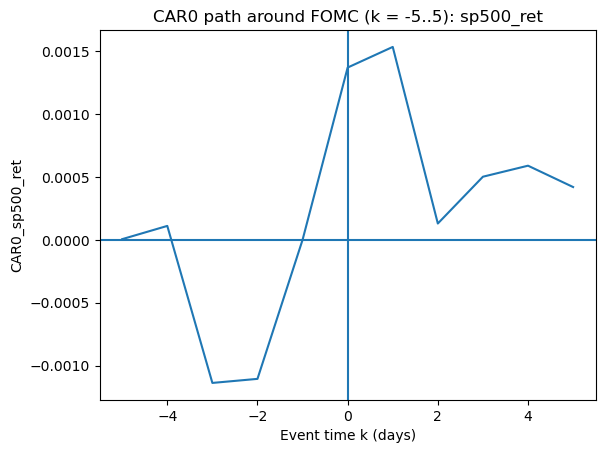

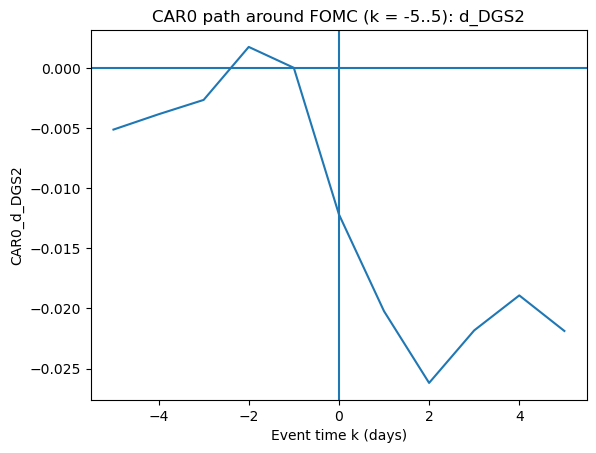

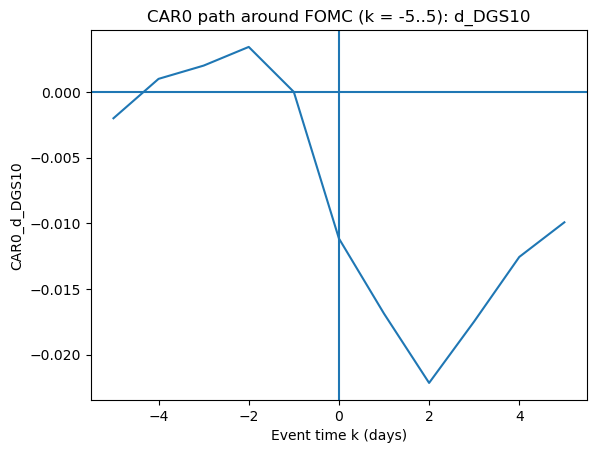

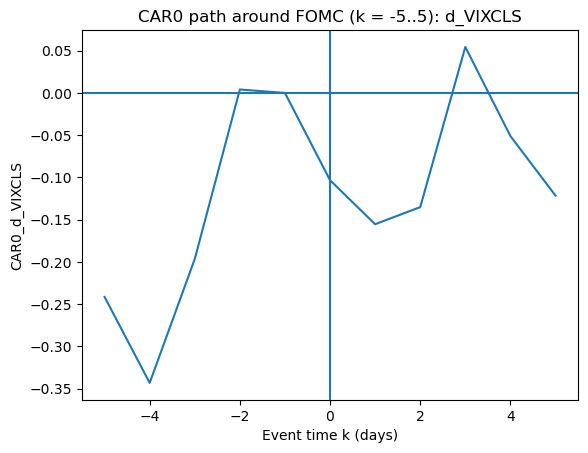

In [51]:
import matplotlib.pyplot as plt

# plotting CAR0 paths ( event-time cumulative, based to 0 at k=-1)
cols = ["sp500_ret", "d_DGS2", "d_DGS10", "d_VIXCLS"]

for col in cols:
    plt.figure()
    plt.plot(aar_k["k"], aar_k[f"CAR0_{col}"])
    plt.axvline(0)
    plt.axhline(0)
    plt.xlabel("Event time k (days)")
    plt.ylabel(f"CAR0_{col}")
    plt.title(f"CAR0 path around FOMC (k = -5..5): {col}")
    plt.show()

In [52]:
# event-time dummies for k 
dummies = pd.get_dummies(panel["k"], prefix="k")
panel2 = pd.concat([panel, dummies], axis=1)

# sanity: should include k_-5 ... k_5
sorted([c for c in panel2.columns if c.startswith("k_")])[:5], sorted([c for c in panel2.columns if c.startswith("k_")])[-5:]

(['k_-1', 'k_-2', 'k_-3', 'k_-4', 'k_-5'], ['k_1', 'k_2', 'k_3', 'k_4', 'k_5'])

In [53]:
import statsmodels.api as sm

y_vars = ["sp500_ret", "d_DGS2", "d_DGS10", "d_VIXCLS"]

# event-time dummies, exclude baseline k = -1
X_cols = [c for c in panel2.columns if c.startswith("k_") and c != "k_-1"]

X = sm.add_constant(panel2[X_cols])

In [54]:
X_cols

['k_-5', 'k_-4', 'k_-3', 'k_-2', 'k_0', 'k_1', 'k_2', 'k_3', 'k_4', 'k_5']

In [56]:
X.dtypes.value_counts(), panel2[y_vars].dtypes

(bool       10
 float64     1
 Name: count, dtype: int64,
 sp500_ret    float64
 d_DGS2       float64
 d_DGS10      float64
 d_VIXCLS     float64
 dtype: object)

In [58]:
# 1) make sure X is purely numeric (no bool)
X = X.astype(float)

In [59]:
for y in y_vars:
    tmp = pd.concat([panel2[[y]], X], axis=1).dropna()
    y_data = tmp[y].astype(float)
    X_use = tmp[X.columns].astype(float)

    model = sm.OLS(y_data, X_use).fit(cov_type="HC1")
    results[y] = model

In [60]:
list(results.keys())

['sp500_ret', 'd_DGS2', 'd_DGS10', 'd_VIXCLS']

In [61]:
results["sp500_ret"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sp500_ret   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9758
Date:                Tue, 06 Jan 2026   Prob (F-statistic):              0.462
Time:                        07:07:50   Log-Likelihood:                 7152.9
No. Observations:                2431   AIC:                        -1.428e+04
Df Residuals:                    2420   BIC:                        -1.422e+04
Df Model:                          10                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.270      0.204      -0.001       0.003
k_-5          -0.0008      0.001     -0.644      0.520      -0.003       0.002
k_-4          -0.0010      0.001     -0.851      0.395      -0.003       0.001
k_-3          -0.0024      0.001     -1.888      0.059      -0.005    9.03e-05
k_-2          -0.0011      0.001     -1.004      0.315      -0.003       0.001
k_0            0.0003      0.001      0.211      0.833      -0.002       0.003
k_1           -0.0009      0.001     -0.723      0.470      -0.003       0.002
k_2           -0.0025      0.001     -2.184      0.029      -0.005      -0.000
k_3           -0.0007      0.001     -0.606      0.544      -0.003       0.002
k_4           -0.0010      0.001     -0.766      0.444      -0.004       0.002
k_5           -0.0013      0.001     -1.103      0.270      -0.004       0.001
==============================================================================
Omnibus:                      528.755   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12903.721
Skew:                          -0.415   Prob(JB):                         0.00
Kurtosis:                      14.256   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [63]:
results["d_DGS2"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 d_DGS2   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.390
Date:                Tue, 06 Jan 2026   Prob (F-statistic):              0.178
Time:                        08:16:54   Log-Likelihood:                 3333.2
No. Observations:                2405   AIC:                            -6644.
Df Residuals:                    2394   BIC:                            -6581.
Df Model:                          10                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.004     -0.421      0.674      -0.010       0.006
k_-5           0.0015      0.006      0.272      0.786      -0.009       0.012
k_-4           0.0030      0.006      0.520      0.603      -0.008       0.014
k_-3           0.0029      0.006      0.508      0.611      -0.008       0.014
k_-2           0.0061      0.006      1.070      0.284      -0.005       0.017
k_0           -0.0104      0.007     -1.485      0.138      -0.024       0.003
k_1           -0.0063      0.006     -1.055      0.291      -0.018       0.005
k_2           -0.0042      0.006     -0.732      0.464      -0.016       0.007
k_3            0.0061      0.006      1.027      0.304      -0.006       0.018
k_4            0.0046      0.005      0.882      0.378      -0.006       0.015
k_5           -0.0012      0.005     -0.236      0.813      -0.011       0.009
==============================================================================
Omnibus:                      553.615   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8367.326
Skew:                          -0.662   Prob(JB):                         0.00
Kurtosis:                      12.041   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [64]:
results["d_DGS10"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                d_DGS10   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.424
Date:                Tue, 06 Jan 2026   Prob (F-statistic):              0.163
Time:                        08:17:19   Log-Likelihood:                 3311.1
No. Observations:                2405   AIC:                            -6600.
Df Residuals:                    2394   BIC:                            -6537.
Df Model:                          10                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.004     -0.887      0.375      -0.011       0.004
k_-5           0.0067      0.006      1.191      0.234      -0.004       0.018
k_-4           0.0064      0.005      1.172      0.241      -0.004       0.017
k_-3           0.0044      0.005      0.810      0.418      -0.006       0.015
k_-2           0.0048      0.006      0.875      0.381      -0.006       0.016
k_0           -0.0077      0.006     -1.284      0.199      -0.020       0.004
k_1           -0.0023      0.007     -0.353      0.724      -0.015       0.010
k_2           -0.0019      0.006     -0.333      0.739      -0.013       0.009
k_3            0.0081      0.006      1.382      0.167      -0.003       0.020
k_4            0.0083      0.006      1.508      0.132      -0.002       0.019
k_5            0.0061      0.005      1.174      0.240      -0.004       0.016
==============================================================================
Omnibus:                      197.513   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1173.121
Skew:                          -0.027   Prob(JB):                    1.82e-255
Kurtosis:                       6.421   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [65]:
results["d_VIXCLS"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               d_VIXCLS   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9857
Date:                Tue, 06 Jan 2026   Prob (F-statistic):              0.453
Time:                        08:17:52   Log-Likelihood:                -5050.5
No. Observations:                2431   AIC:                         1.012e+04
Df Residuals:                    2420   BIC:                         1.019e+04
Df Model:                          10                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.118     -0.035      0.972      -0.235       0.227
k_-5           0.0595      0.206      0.289      0.772      -0.344       0.463
k_-4          -0.0977      0.155     -0.631      0.528      -0.401       0.206
k_-3           0.1510      0.171      0.882      0.378      -0.185       0.487
k_-2           0.2048      0.152      1.351      0.177      -0.092       0.502
k_0           -0.0992      0.205     -0.483      0.629      -0.502       0.304
k_1           -0.0480      0.178     -0.270      0.787      -0.396       0.300
k_2            0.0243      0.156      0.156      0.876      -0.281       0.330
k_3            0.1938      0.196      0.987      0.323      -0.191       0.579
k_4           -0.1014      0.180     -0.563      0.574      -0.455       0.252
k_5           -0.0664      0.156     -0.426      0.670      -0.372       0.239
==============================================================================
Omnibus:                     1670.226   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95197.482
Skew:                           2.601   Prob(JB):                         0.00
Kurtosis:                      33.212   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [69]:
import pandas as pd

rows = []

for y, model in results.items():
    for k in [c for c in model.params.index if c.startswith("k_")]:
        rows.append({
            "dependent": y,
            "k": k,
            "coef": model.params[k],
            "se": model.bse[k],
            "pval": model.pvalues[k]
        })


event_table = pd.DataFrame(rows)
event_table

,dependent,k,coef,se,pval
0,sp500_ret,k_-5,-0.000849,0.001318,0.519537
1,sp500_ret,k_-4,-0.001000,0.001176,0.394953
2,sp500_ret,k_-3,-0.002354,0.001247,0.059084
3,sp500_ret,k_-2,-0.001073,0.001069,0.315339
4,sp500_ret,k_0,0.000265,0.001252,0.832693
5,sp500_ret,k_1,-0.000941,0.001303,0.469887
6,sp500_ret,k_2,-0.002509,0.001149,0.028988
7,sp500_ret,k_3,-0.000733,0.001209,0.544185
8,sp500_ret,k_4,-0.001018,0.001328,0.443608
9,sp500_ret,k_5,-0.001275,0.001156,0.270020


In [70]:
event_table[event_table["pval"] < 0.05]

,dependent,k,coef,se,pval
6,sp500_ret,k_2,-0.002509,0.001149,0.028988


In [71]:
needed = ["panel", "panel2", "results"]
{v: (v in globals()) for v in needed}

{'panel': True, 'panel2': True, 'results': True}

In [72]:
# columns that should exist in panel2 from pd.get_dummies(prefix="k")
dummy_cols = sorted([c for c in panel2.columns if c.startswith("k_")])
dummy_cols[:10], dummy_cols[-10:]

(['k_-1', 'k_-2', 'k_-3', 'k_-4', 'k_-5', 'k_0', 'k_1', 'k_2', 'k_3', 'k_4'],
 ['k_-2', 'k_-3', 'k_-4', 'k_-5', 'k_0', 'k_1', 'k_2', 'k_3', 'k_4', 'k_5'])

In [73]:
X_cols = [c for c in panel2.columns if c.startswith("k_") and c != "k_-1"]
sorted(X_cols)

['k_-2', 'k_-3', 'k_-4', 'k_-5', 'k_0', 'k_1', 'k_2', 'k_3', 'k_4', 'k_5']

In [93]:
import pandas as pd
import numpy as np

y_vars = ["sp500_ret", "d_DGS2", "d_DGS10", "d_VIXCLS"]

rows = []
for y in y_vars:
    m = results[y]  
    
    for kcol in [c for c in m.params.index if c.startswith("k_")]:
        rows.append({
            "dependent": y,
            "k": int(kcol.replace("k_", "")),    
            "coef": float(m.params[kcol]),
            "se": float(m.bse[kcol]),
            "pval": float(m.pvalues[kcol]),
            "ci_low": float(m.conf_int().loc[kcol, 0]),
            "ci_high": float(m.conf_int().loc[kcol, 1]),
        })

event_table = pd.DataFrame(rows).sort_values(["dependent", "k"]).reset_index(drop=True)
event_table.head(12)


,dependent,k,coef,se,pval,ci_low,ci_high
0,d_DGS10,-5,0.006683,0.005613,0.233847,-0.004319,0.017684
1,d_DGS10,-4,0.006425,0.005483,0.241311,-0.004322,0.017171
2,d_DGS10,-3,0.004434,0.005475,0.418032,-0.006297,0.015165
3,d_DGS10,-2,0.004847,0.005536,0.381324,-0.006004,0.015697
4,d_DGS10,0,-0.007733,0.006024,0.199292,-0.019540,0.004075
5,d_DGS10,1,-0.002296,0.006506,0.724111,-0.015047,0.010454
6,d_DGS10,2,-0.001851,0.005556,0.739073,-0.012740,0.009039
7,d_DGS10,3,0.008106,0.005868,0.167105,-0.003394,0.019607
8,d_DGS10,4,0.008334,0.005526,0.131547,-0.002498,0.019165
9,d_DGS10,5,0.006061,0.005162,0.240357,-0.004057,0.016179


In [94]:
event_table.groupby("dependent")["k"].count()

dependent
d_DGS10      10
d_DGS2       10
d_VIXCLS     10
sp500_ret    10
Name: k, dtype: int64

In [95]:
event_table[event_table["pval"] < 0.05].sort_values(["dependent", "k"])

,dependent,k,coef,se,pval,ci_low,ci_high
36,sp500_ret,2,-0.002509,0.001149,0.028988,-0.004762,-0.000257


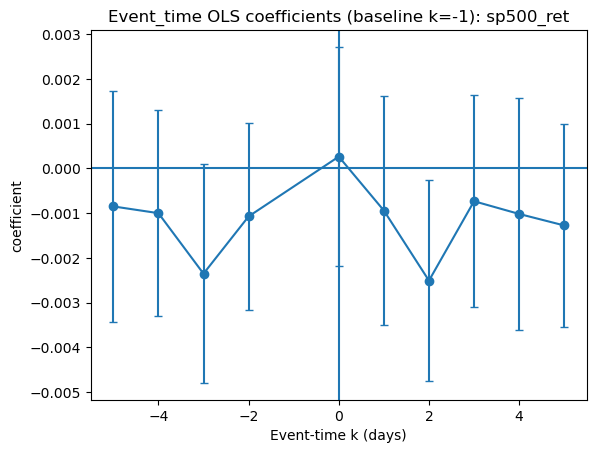

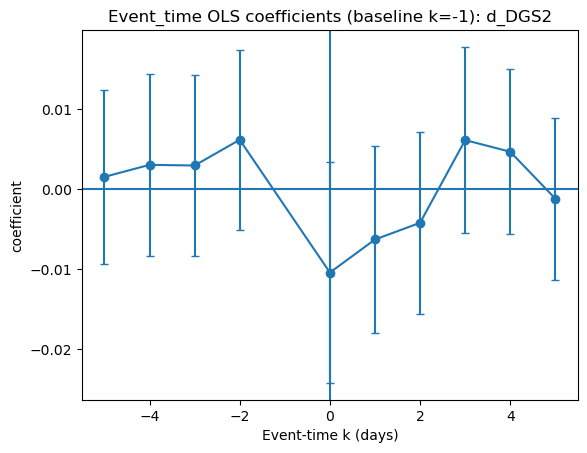

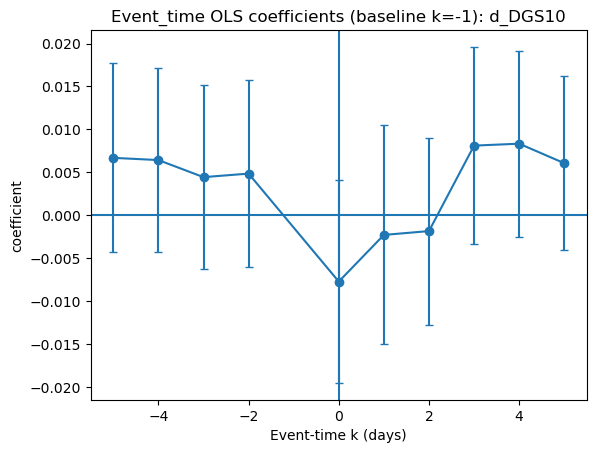

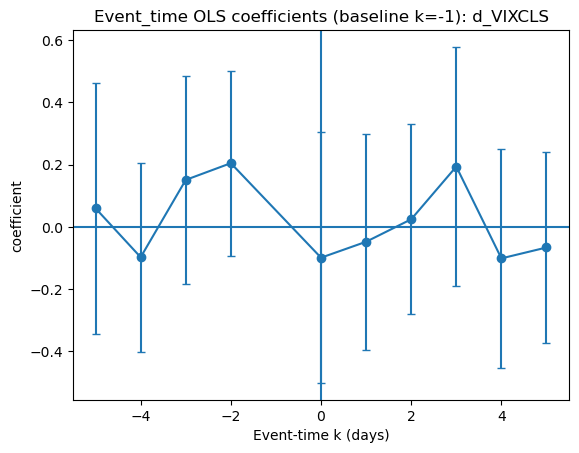

In [96]:
import matplotlib.pyplot as plt

def plot_events_coefs(event_table, dep):
    d = event_table [event_table["dependent"] == dep].sort_values("k")

    plt.figure()
    plt.errorbar(
        d["k"],
        d["coef"],
        yerr=[d["coef"] - d["ci_low"], d["ci_high"] - d["coef"]],
        fmt="o-",
        capsize=3
    )
    plt.axhline(0)
    plt.axvline(0)
    plt.title(f"Event_time OLS coefficients (baseline k=-1): {dep}")
    plt.xlabel("Event-time k (days)")
    plt.ylabel("coefficient")
    plt.show()

for dep in y_vars:
    plot_events_coefs(event_table, dep)

In [97]:
event_table.to_csv("project1_event_ols_table.csv", index=-False)
print("Saved: project1_event_ols_table.csv")

Saved: project1_event_ols_table.csv


In [98]:
def save_event_plot(event_table, dep, filename):
    d = event_table[event_table["dependent"] == dep].sort_values("k")

    plt.figure()
    plt.errorbar(
        d["k"],
        d["coef"],
        yerr=[d["coef"] - d["ci_low"], d["ci_high"] - d["coef"]],
        fmt="o-",
        capsize=3
    )
    plt.axhline(0)
    plt.axvline(0)
    plt.title(f"Event-time OLS coefficients (baseline k=-1): {dep}")
    plt.xlabel("Event time k (days)")
    plt.ylabel("Coefficient")
    plt.tight_layout()
    plt.savefig(filename, dpi=200)
    plt.close()

for dep in y_vars:
    save_event_plot(event_table, dep, f"project1_coefplot_{dep}.png")

print("Saved 4 plots: project1_coefplot_*.png")

Saved 4 plots: project1_coefplot_*.png


In [99]:
sig = event_table[event_table["pval"] < 0.05].sort_values(["dependent", "k"])

print("significant event_time coefficients  (p < 0.05):")
if sig.empty:
    print("None")
else:
    display(sig[["dependent", "k", "coef", "se", "pval", "ci_low", "ci_high"]])

significant event_time coefficients  (p < 0.05):


,dependent,k,coef,se,pval,ci_low,ci_high
36,sp500_ret,2,-0.002509,0.001149,0.028988,-0.004762,-0.000257


In [100]:
panel_small = panel[(panel["k"] >= -3) & (panel["k"] <= 3)].copy()

dummies_small = pd.get_dummies(panel_small["k"], prefix="k")
panel_small2 = pd.concat([panel_small, dummies_small], axis=1)

X_cols_small = [c for c in panel_small2.columns if c.startswith("k_") and c != "k_-1"]

import statsmodels.api as sm
X_small = sm.add_constant(panel_small2[X_cols_small]).astype(float)

results_small = {}
for y in y_vars:
    tmp = pd.concat([panel_small2[[y]], X_small], axis=1).dropna()
    y_data = tmp[y].astype(float)
    X_use = tmp[X_small.columns].astype(float)
    results_small[y] = sm.OLS(y_data, X_use).fit(cov_type="HC1")

results_small["sp500_ret"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sp500_ret   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.603
Date:                Wed, 07 Jan 2026   Prob (F-statistic):              0.143
Time:                        07:57:42   Log-Likelihood:                 4586.7
No. Observations:                1547   AIC:                            -9159.
Df Residuals:                    1540   BIC:                            -9122.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.270      0.204      -0.001       0.003
k_-3          -0.0024      0.001     -1.888      0.059      -0.005    9.03e-05
k_-2          -0.0011      0.001     -1.004      0.315      -0.003       0.001
k_0            0.0003      0.001      0.211      0.833      -0.002       0.003
k_1           -0.0009      0.001     -0.723      0.470      -0.003       0.002
k_2           -0.0025      0.001     -2.184      0.029      -0.005      -0.000
k_3           -0.0007      0.001     -0.606      0.544      -0.003       0.002
==============================================================================
Omnibus:                      249.256   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2969.525
Skew:                           0.342   Prob(JB):                         0.00
Kurtosis:                       9.753   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [101]:
pre_cols = [c for c in X_cols if c.startswith("k_") and int(c.split("_")[1]) < 0]

for y in y_vars:
    wald = results[y].wald_test(" = ".join(pre_cols) + " = 0")
    print(y, wald)

sp500_ret <Wald test (chi2): statistic=[[3.63379022]], p-value=0.457828848630761, df_denom=4>
d_DGS2 <Wald test (chi2): statistic=[[1.28363171]], p-value=0.8641464714193492, df_denom=4>
d_DGS10 <Wald test (chi2): statistic=[[1.8949271]], p-value=0.7550768342606613, df_denom=4>
d_VIXCLS <Wald test (chi2): statistic=[[5.58058041]], p-value=0.23273667417007096, df_denom=4>


C:\Users\dm46143p\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


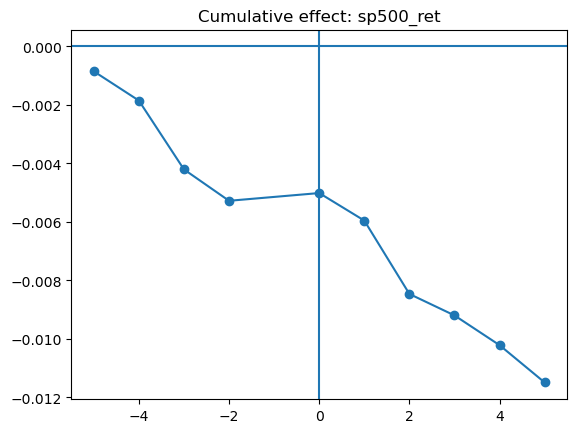

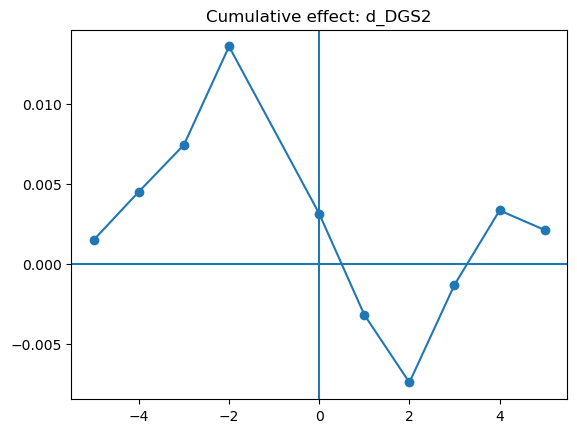

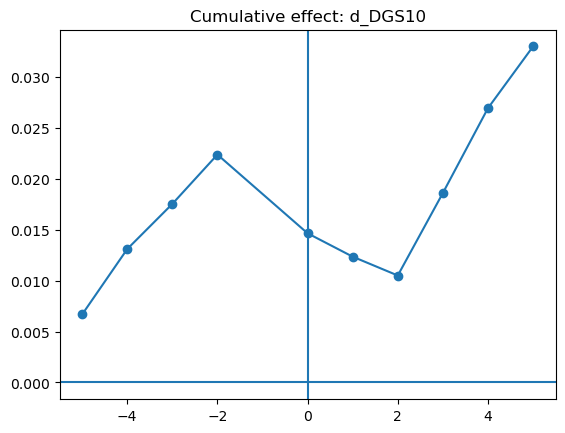

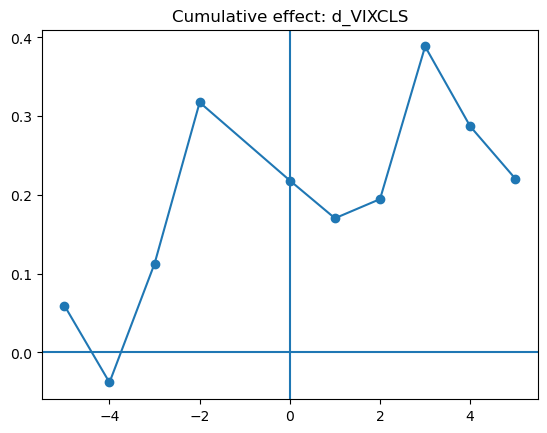

In [102]:
def plot_cumulative(event_table, dep):
    tmp = event_table[event_table["dependent"] == dep].sort_values("k")
    tmp["cum"] = tmp["coef"].cumsum()

    plt.figure()
    plt.plot(tmp["k"], tmp["cum"], marker="o")
    plt.axhline(0)
    plt.axvline(0)
    plt.title(f"Cumulative effect: {dep}")
    plt.show()

for dep in y_vars:
    plot_cumulative(event_table, dep)